<center> <h1>Module 8 - PCA and PCR with a Binary Response </h1> </center>
<center> <h2>Class Coding Analysis</h2> </center>

In [1]:
# load packages here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# set seed
import random
random.seed(5600)

**This is the same data set used in the Module 8 Course Notes. You can check your code output against the output from the course notes to verify you are getting the correct results.**

This data set comes from Kaggle: https://www.kaggle.com/code/raghadalharbi/breast-cancer-survival-prediction-acc-0-779/notebook

Breast cancer is the most frequent cancer among women, impacting about 2.1 million women each year. The goal is to use this data set to predict breast cancer survival (called "overall_survival" in the data set) using clinical data and gene expression profiles. The data set consists of 1904 patients with about 700 variables representing clinical and gened expression data.

Do the following:

1. Download the "METABRIC_RNA_Mutation.csv" file from Canvas and put it in the same folder as this file.
2. Read in the data set, call it "dna", and look at a summary of the data.
3. Make sure the class of "dna" is a *Pandas dataframe*.

In [2]:
dna = pd.read_csv("METABRIC_RNA_Mutation.csv")
dna.describe()

C:\Users\a01406508\AppData\Local\Temp\ipykernel_23180\643882244.py:1: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  dna = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,...,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
count,1904.000000,1904.000000,1904.000000,1904.000000,1832.000000,1904.000000,1904.000000,1859.000000,1904.000000,1904.000000,...,1.904000e+03,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03,1.904000e+03,1.904000e+03,1904.000000,1.904000e+03
mean,3921.982143,61.087054,0.207983,2.643908,2.415939,0.616597,2.002101,5.697687,4.033019,125.121324,...,4.726891e-07,-3.676471e-07,-9.453782e-07,-1.050420e-07,-0.000002,3.676471e-07,4.726891e-07,7.878151e-07,0.000000,3.731842e-18
std,2358.478332,12.978711,0.405971,1.228615,0.650612,0.486343,4.079993,4.058778,1.144492,76.334148,...,1.000263e+00,1.000262e+00,1.000262e+00,1.000263e+00,1.000262,1.000264e+00,1.000262e+00,1.000263e+00,1.000262,1.000262e+00
min,0.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,-2.120800e+00,-3.364800e+00,-2.719400e+00,-4.982700e+00,-2.981700,-3.833300e+00,-3.609300e+00,-1.166900e+00,-2.112600,-1.051600e+00
25%,896.500000,51.375000,0.000000,1.000000,2.000000,0.000000,0.000000,3.000000,3.046000,60.825000,...,-6.188500e-01,-6.104750e-01,-6.741750e-01,-6.136750e-01,-0.632900,-6.664750e-01,-7.102000e-01,-5.058250e-01,-0.476200,-7.260000e-01
50%,4730.500000,61.770000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.042000,115.616667,...,-2.456500e-01,-4.690000e-02,-1.422500e-01,-5.175000e-02,-0.026650,7.000000e-04,-2.980000e-02,-2.885500e-01,-0.133400,-4.248000e-01
75%,5536.250000,70.592500,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040250,184.716667,...,3.306000e-01,5.144500e-01,5.146000e-01,5.787750e-01,0.590350,6.429000e-01,5.957250e-01,6.022500e-02,0.270375,4.284000e-01
max,7299.000000,96.290000,1.000000,5.000000,3.000000,1.000000,45.000000,80.000000,6.360000,355.200000,...,6.534900e+00,1.027030e+01,6.329000e+00,4.571300e+00,12.742300,3.938800e+00,3.833400e+00,1.088490e+01,12.643900,3.284400e+00


In [3]:
dna.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dna.shape

(1904, 693)

In [5]:
# Majority classifier/baseline accuracy rate
print(dna[['overall_survival']].value_counts())
print(1103 / (1103 + 801))  # 57.93%

overall_survival
0                   1103
1                    801
dtype: int64
0.5793067226890757


### Clean the data based on recommendations from Kaggle notebooks
Note: You would spend much more time here understanding the data and doing EDA, but we are skipping that for sake of illustration of PCR.

In [6]:
# droping some columns, including the response variable (we'll add it back in later)
genetic_features_to_drop = dna.columns[520:]
genetic_df = dna.drop(genetic_features_to_drop, axis = 1)
# droping clinical data
genetic_features_to_drop = genetic_df.columns[4:35]
genetic_df = genetic_df.drop(genetic_features_to_drop, axis = 1)
genetic_df = genetic_df.drop(['patient_id', 'age_at_diagnosis', 
                              'type_of_breast_surgery', 'cancer_type'], axis = 1)
genetic_df.shape

(1904, 485)

In [7]:
genetic_df = genetic_df.iloc[:, :-174]

In [8]:
genetic_df.shape  # ideally want at least 311*6 = 1866 observations, 
# so logistic regression could potentially work in this case

(1904, 311)

### Split Data in Train/Test Sets

In [9]:
y = dna['overall_survival']
X = genetic_df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5600)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1523, 311) (1523,)
(381, 311) (381,)


In [11]:
# Majority classifier/baseline accuracy rate on test set
print(y_test.value_counts())
print(227 / (227 + 154))  # 59.58%

0    227
1    154
Name: overall_survival, dtype: int64
0.5958005249343832


### Standardize the Predictor Variables

In [12]:
# Get mean/sd from training data, and apply to both 
# training and testing data to avoid "data leakage"
variable_names = X_train.columns
scaler = StandardScaler().fit(X_train[variable_names])
X_train[variable_names] = scaler.transform(X_train[variable_names])
X_test[variable_names] = scaler.transform(X_test[variable_names])

## Use Logistic Regression for Comparison Models

### Logistic Regression Model 1
Using LASSO (L1 penalty term). Note, we'd need to check assumptions before proceeding with this model.

In [13]:
# Fit model
logistic_lasso_mod = LogisticRegression(penalty = 'l1',
                                        solver = 'liblinear')
logistic_lasso_mod.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [14]:
# Figure out how many variables the model kept
logistic_lasso_mod.coef_.size  # 311 variables total
np.count_nonzero(logistic_lasso_mod.coef_)  # 283 variables kept

283

#### Find the cutoff value that minimizes the percent misclassified

In [15]:
# logistic_lasso_mod.predict_proba(X_train)

In [16]:
possible_cutoffs = np.linspace(0, 1, 100)
percent_misclass_lasso = np.ones(100)
# Returns probability of y=0 and y=1, so we will choose 
# the last column reflecting the y=1 probabilities:
predicted_probabilities_lasso = logistic_lasso_mod.predict_proba(X_train)[:, 1]
    
for i in range(len(possible_cutoffs) - 1):
  cutoff = possible_cutoffs[i]
  classify = (predicted_probabilities_lasso > cutoff).astype(int)
  percent_misclass_lasso[i] = np.mean((classify != y_train.astype(int)).astype(int))

cutoff_lasso = possible_cutoffs[np.argmin(percent_misclass_lasso)]
cutoff_lasso

0.4646464646464647

#### Create a confusion matrix FOR THE TEST DATA SET using the best cutoff value found above

In [17]:
# Get predicted probabilities for the test data set
pred_probs_lasso_test = logistic_lasso_mod.predict_proba(X_test)[:, 1]
# Use the cutoff to get predicted classifications of 0/1
preds_lasso_test = (pred_probs_lasso_test > cutoff_lasso).astype(int)
# Get confusion matrix
conf_mat_lasso = confusion_matrix(y_test, preds_lasso_test)
conf_mat_lasso

array([[147,  80],
       [ 73,  81]], dtype=int64)

In [18]:
# Test set accuracy (using c = 0.46, found above)
# Note: conf_mat_lasso[0, 0] gets the upper left value
# Note: conf_mat_lasso[1, 1] gets the bottom right value
(conf_mat_lasso[0, 0] + conf_mat_lasso[1, 1]) / X_test.shape[0]

0.5984251968503937

In [19]:
# Note: this code is a quick way to see accuracy, but it
# only provides the accuracy for when c = 0.50
# Test set accuracy (using c = 0.50)

# logistic_lasso_mod.score(X_test, y_test)

### Logistic Regression Model 2
Using ridge regression (L2 penalty term). Note, we'd need to check assumptions before proceeding with this model.

In [20]:
# Fit model
logistic_ridge_mod = LogisticRegression(penalty = 'l2',
                                        solver = 'liblinear')
logistic_ridge_mod.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

#### Find the cutoff value that minimizes the percent misclassified

In [21]:
possible_cutoffs = np.linspace(0, 1, 100)
percent_misclass_ridge = np.ones(100)
# Returns probability of y=0 and y=1, so we will choose 
# the last column reflecting the y=1 probabilities:
predicted_probabilities_ridge = logistic_ridge_mod.predict_proba(X_train)[:, 1]
    
for i in range(len(possible_cutoffs) - 1):
  cutoff = possible_cutoffs[i]
  classify = (predicted_probabilities_ridge > cutoff).astype(int)
  percent_misclass_ridge[i] = np.mean((classify != y_train.astype(int)).astype(int))

cutoff_ridge = possible_cutoffs[np.argmin(percent_misclass_ridge)]
cutoff_ridge

0.4747474747474748

#### Create a confusion matrix FOR THE TEST DATA SET using the best cutoff value found above

In [22]:
# Get predicted probabilities for the test data set
pred_probs_ridge_test = logistic_ridge_mod.predict_proba(X_test)[:, 1]
# Use the cutoff to get predicted classifications of 0/1
preds_ridge_test = (pred_probs_ridge_test > cutoff_ridge).astype(int)
# Get confusion matrix
conf_mat_ridge = confusion_matrix(y_test, preds_ridge_test)
conf_mat_ridge

array([[145,  82],
       [ 75,  79]], dtype=int64)

In [23]:
# Test set accuracy (using c = 0.47, found above)
(conf_mat_ridge[0, 0] + conf_mat_ridge[1, 1]) / X_test.shape[0]

0.5879265091863517

In [24]:
# Note: this code is a quick way to see accuracy, but it
# only provides the accuracy for when c = 0.50
# Test set accuracy (using c = 0.50)

# logistic_ridge_mod.score(X_test, y_test)

## PCA

In [25]:
# X_train.shape[1]

In [26]:
pca = PCA(n_components = X_train.shape[1]).fit(X_train)
pc_train = pca.transform(X_train)

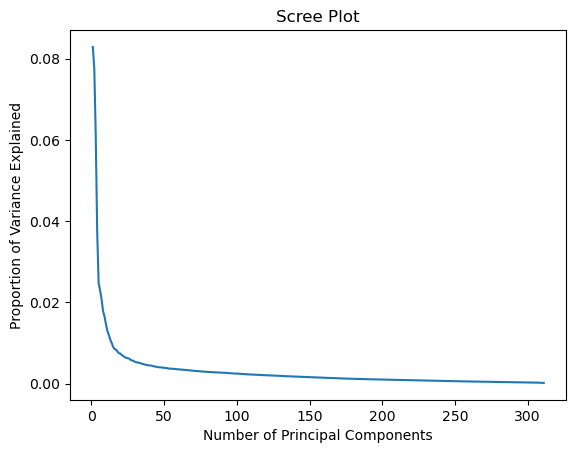

In [27]:
# Create Scree Plot
sns.lineplot(x = np.arange(1, X_train.shape[1] + 1), 
             y = pca.explained_variance_ratio_)
plt.xlabel("Number of Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot")
plt.show()

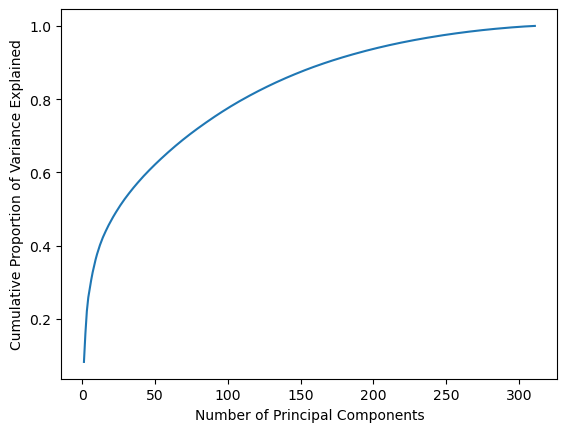

In [28]:
sns.lineplot(x = np.arange(1, X_train.shape[1] + 1),
             y = np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.show()

In [29]:
# 50.4% of the variability (of the predictors) explained with 25 principal components
print(np.cumsum(pca.explained_variance_ratio_)[:25][-1])  # -1 grabs the last value (total cummulative sum)
# 87.5% of the variability (of the predictors) explained with 150 principal components
print(np.cumsum(pca.explained_variance_ratio_)[:150][-1])

0.5041284177511045
0.874642786106837


## PCR

Start by using cross-validation to choose the number of principal components.

In [30]:
# Author: Wenhao Zhang <wenhaoz@ucla.edu>
# Website: https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_refit_callable.html#sphx-glr-auto-examples-model-selection-plot-grid-search-refit-callable-py
# Code modified slightly by Dr. Z

# Calculate the lower bound within 1 standard deviation
# of the best `mean_test_scores`.
def lower_bound(cv_results):
    best_score_idx = np.argmax(cv_results["mean_test_score"])  # find maximum position of accuracy
    return (
        cv_results["mean_test_score"][best_score_idx]
        - (cv_results["std_test_score"][best_score_idx] / np.sqrt(5))  # 5-fold CV
    )

# Balance model complexity with cross-validated score.
def best_low_complexity(cv_results):
    threshold = lower_bound(cv_results)  # pass in (positive) MSEs
    candidate_idx = np.flatnonzero(cv_results["mean_test_score"] >= threshold)
    best_idx = candidate_idx[
        cv_results["param_reduce_dim__n_components"][candidate_idx].argmin()
    ]
    return best_idx

pipe = Pipeline(
    [
        ("reduce_dim", PCA(random_state = 42)),
        ("classify", LogisticRegression(fit_intercept = True,
                                        penalty = None)),
    ]
)

In [31]:
param_grid = {"reduce_dim__n_components": np.arange(15, 151, 5)}

# 5-fold cross validation to choose the number of components
grid = GridSearchCV(
    pipe,
    cv = 5,
    n_jobs = 1,
    param_grid = param_grid,
    scoring = "accuracy",
    refit = best_low_complexity, 
)

grid.fit(X_train, y_train)

n_components = grid.cv_results_["param_reduce_dim__n_components"]
test_scores = grid.cv_results_["mean_test_score"]  # get positive MSE

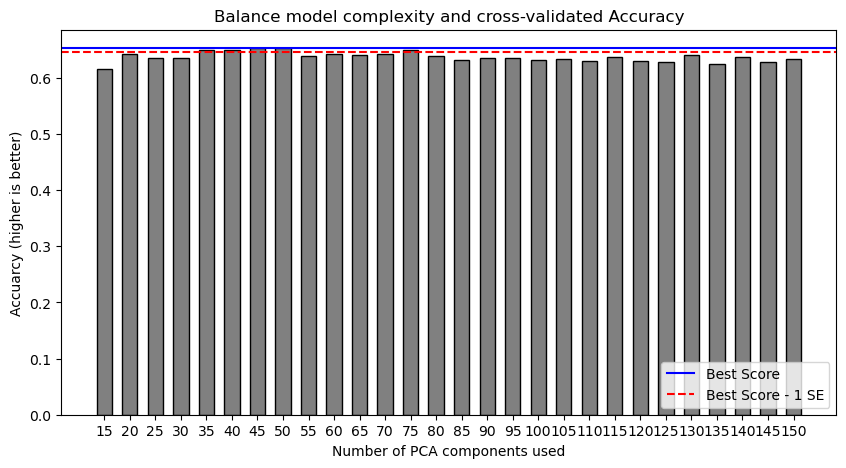

In [32]:
plt.figure(figsize = (10, 5))
plt.bar(n_components, 
        test_scores, 
        width = 3,
        color = "grey",
        edgecolor = 'black')

lower = lower_bound(grid.cv_results_)
plt.axhline(np.max(test_scores), 
            linestyle = "-", 
            color = "blue", 
            label = "Best Score")
plt.axhline(lower, 
            linestyle = "--",
            color = "red", 
            label = "Best Score - 1 SE")

plt.title("Balance model complexity and cross-validated Accuracy")
plt.xlabel("Number of PCA components used")
plt.ylabel("Accuarcy (higher is better)")
plt.xticks(n_components.tolist())
plt.legend(loc = "lower right")
plt.show()

In [33]:
print(n_components[np.argmax(test_scores)], "components yields the best accuracy")
best_index_ = grid.best_index_
print(n_components[best_index_], "components are selected based on the 1 SE rule")

50 components yields the best accuracy
35 components are selected based on the 1 SE rule


### PCR Model with 35 Principal Components
Using 35 principal components (results from the 1 SE rule from cross-validation).

In [34]:
# Find the first 35 principal components
pca_35 = PCA(n_components = 35).fit(X_train)
# Now transform our data into the 35 components found above
pc_35 = pca_35.transform(X_train)

In [35]:
X_train_pca_35 = sm.add_constant(pc_35)
mod_pca_35 = sm.Logit(y_train, X_train_pca_35)
res_pca_35 = mod_pca_35.fit()
# res_pca_35.summary()

Optimization terminated successfully.
         Current function value: 0.610440
         Iterations 5


#### Find the cutoff value that minimizes the percent misclassified

In [36]:
possible_cutoffs = np.linspace(0, 1, 100)
percent_misclass_pca_35 = np.ones(100)
predicted_probabilities_pca_35 = np.exp(res_pca_35.fittedvalues) / (1 + np.exp(res_pca_35.fittedvalues))
    
for i in range(len(possible_cutoffs) - 1):
  cutoff = possible_cutoffs[i]
  classify = (predicted_probabilities_pca_35 > cutoff).astype(int)
  percent_misclass_pca_35[i] = np.mean((classify != y_train.astype(int)).astype(int))

cutoff_pca_35 = possible_cutoffs[np.argmin(percent_misclass_pca_35)]
cutoff_pca_35

0.5151515151515152

#### Create a confusion matrix FOR THE TEST DATA SET using the best cutoff value found above

In [37]:
# Transform the test data into the 35 components found above
pc_35_test = pca_35.transform(X_test)
X_test_pca_35 = sm.add_constant(pc_35_test)
# Get predicted probabilities for the test data set
pred_probs_pca_35_test = res_pca_35.predict(X_test_pca_35)

In [38]:
# Use the cutoff to get predicted classifications of 0/1
preds_pca_35_test = (pred_probs_pca_35_test > cutoff_pca_35).astype(int)
# Get confusion matrix
conf_mat_pca_35 = confusion_matrix(y_test, preds_pca_35_test)
conf_mat_pca_35

array([[178,  49],
       [ 90,  64]], dtype=int64)

In [39]:
# Test set accuracy
(conf_mat_pca_35[0, 0] + conf_mat_pca_35[1, 1]) / X_test.shape[0]

0.6351706036745407

### Example of Model Assumption Checking with the PCR Model with 35 Principal Components

In [40]:
X_train_pca_35_df = pd.DataFrame(X_train_pca_35)
# X_train_pca_35_df
# X_train_pca_35_df.shape[1]

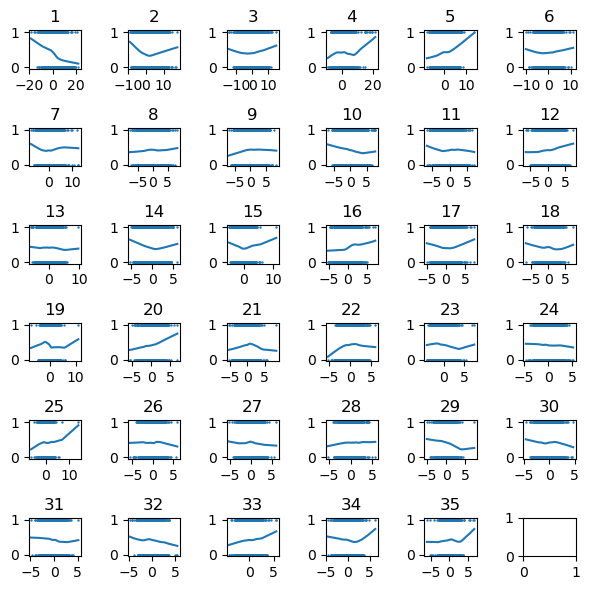

In [41]:
def scatterplot_with_smoother(ax, y, x, title):
    smoothed = sm.nonparametric.lowess(y, x)
    ax.scatter(y = y, x = x, s = 0.5)
    ax.plot(smoothed[:, 0], smoothed[:, 1])
    ax.set_title(title)

fig, ax = plt.subplots(6, 6, figsize = (6, 6))
variables = list(range(1, X_train_pca_35_df.shape[1]))

# Plot each variable
for i, var in enumerate(variables):
    scatterplot_with_smoother(ax[i // 6, i % 6], 
                              y_train, 
                              X_train_pca_35_df[var],
                              variables[i])
plt.tight_layout()
plt.show()

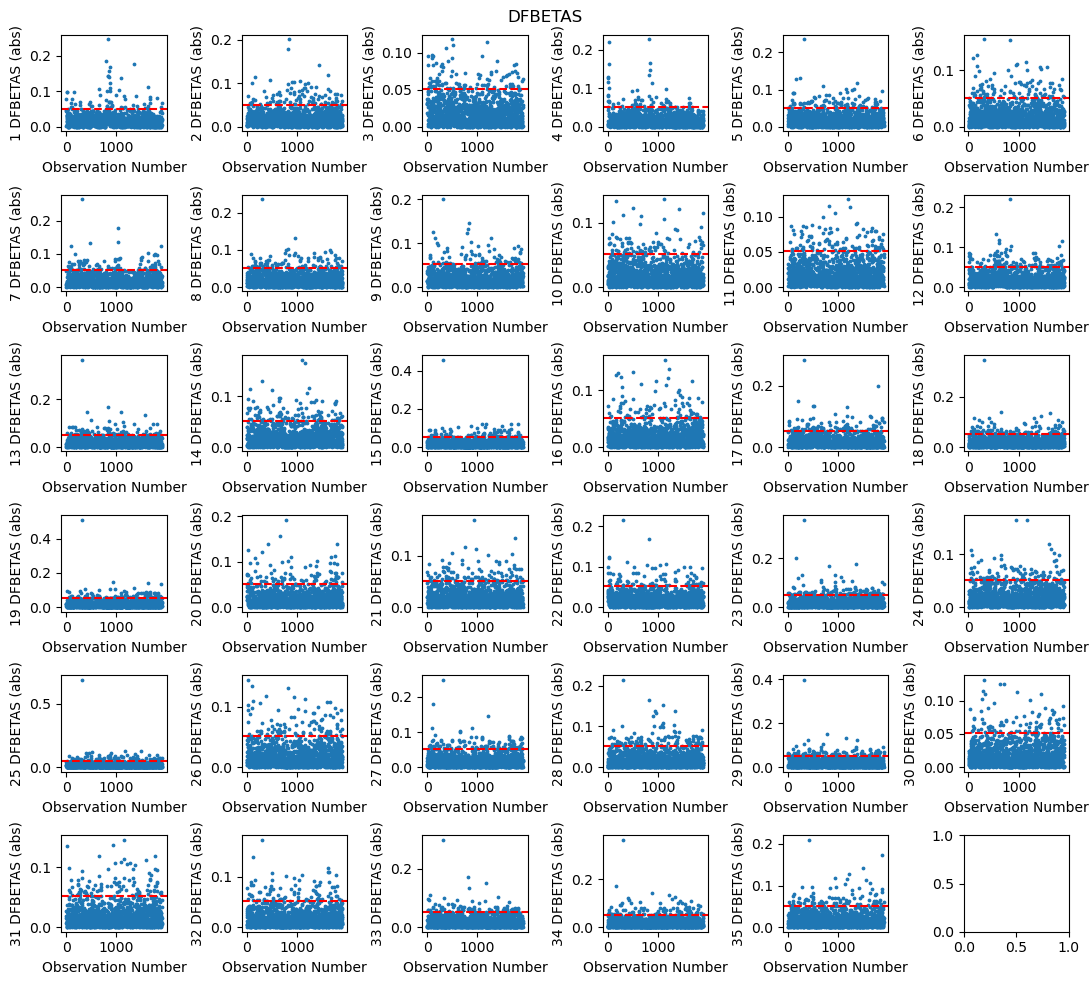

In [42]:
# DFBETAS
X_train_df = pd.DataFrame(X_train)

def plot_dfbetas(column, ax, label_level = 2 / np.sqrt(len(X_train_df))):
    idx = X_train_pca_35_df.columns.get_loc(column)
    X_train_df['dfbetas_' + str(column)] = res_pca_35.get_influence().dfbetas[:, idx]

    ax.set_ylabel(str(column) + " DFBETAS (abs)")
    ax.set_xlabel("Observation Number")
    ax.scatter(X_train_df.index, np.abs(X_train_df['dfbetas_' + str(column)]), s = 3)
    ax.axhline(y = label_level, color = 'r', linestyle = 'dashed')
        
fig, axes = plt.subplots(6, 6, figsize = (11, 10))
plt.suptitle("DFBETAS")
variable_names = list(range(1, X_train_pca_35_df.shape[1]))
for i, var in enumerate(variable_names):
    plot_dfbetas(var, axes[i // 6, i % 6])
fig.tight_layout()
plt.show()

In [43]:
# Variance Inflation Factors (VIF)
env_vifs_pca_35 = pd.DataFrame()
env_vifs_pca_35['Feature'] = X_train_pca_35_df.columns[1:]
env_vifs_pca_35['VIF'] = [vif(X_train_pca_35_df, i) for i in range(1, len(X_train_pca_35_df.columns))]

print("Max = ", max(env_vifs_pca_35['VIF']))
print("Mean = ", np.mean(env_vifs_pca_35['VIF']))
env_vifs_pca_35

Max =  1.0000199927289435
Mean =  1.000005545903807


,Feature,VIF
0,1,1.000000
1,2,1.000000
2,3,1.000000
3,4,1.000000
4,5,1.000000
5,6,1.000000
6,7,1.000000
7,8,1.000000
8,9,1.000000
9,10,1.000000


## Summary and Conclusions

For this data set, linear regression with variable selection outperformed the principal component regression model. The traditional linear regression model also has the benefit of being way more interpretable than the PCR model. While PCR did not outperform traditional regression for this data set, it certainly could for other data sets.